# Basics of Qiskit

In [36]:
# basics of vectors using numpy
from numpy import array # type: ignore
from numpy import matmul # type: ignore

# simple vectors
ket0 = array([1, 0])
ket1 = array([0, 1])
display(ket0 / 2 + ket1 / 2) # alt:  (ket0 / 2 + ket1 / 2) 

# simple operations
M1 = array([[1, 1], [0, 0]])
M2 = array([[1, 1], [1, 0]])
display(M1 / 2 + M2 / 2) # alt: (M1 / 2 + M2 / 2) 

# applying operations with matrix multiplications
display(matmul(M1, ket1))
display(matmul(M1, M2))
display(matmul(M2, M1))

array([0.5, 0.5])

array([[1. , 1. ],
       [0.5, 0. ]])

array([1, 0])

array([[2, 1],
       [0, 0]])

array([[1, 1],
       [1, 1]])

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

<IPython.core.display.Latex object>

True

False

{'0': 5533, '1': 4467}

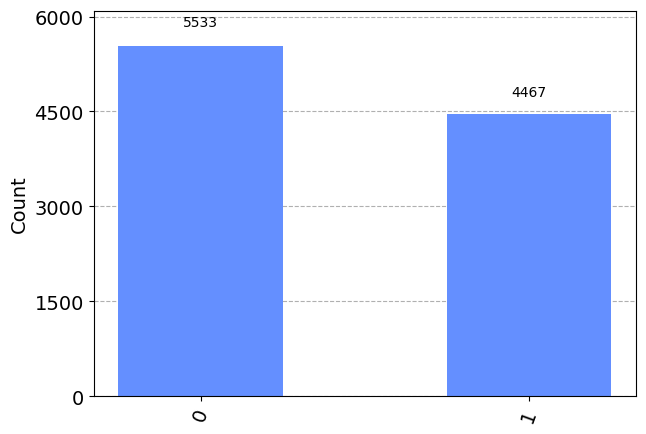

In [37]:
# basics of quantum states
from qiskit.quantum_info import Statevector # type: ignore
from numpy import sqrt # type: ignore
from qiskit.visualization import plot_histogram # type: ignore

# defining the states
u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

# displaying the states: values and latex format
display(u.draw("latex"))
display(v.draw("text"))
display(w.draw("latex"))

# check validity of the state vectors: i.e., that it has Euclidean norm equal to 1
display(u.is_valid())
display(w.is_valid())
# measuring: simulates a standard basis measurement. It returns the result of that measurement, plus the new quantum state of our system after that measurement.
u.measure() # Measurement outcomes are probabilistic, so the same method can return different results. Try running the cell a few times to see this.
# the simulation of any number of measurements on the system
statistics = v.sample_counts(10000)
display(statistics)
plot_histogram(statistics)


In [38]:
# basics of operation on the state vectors
from qiskit.quantum_info import Operator # type: ignore

X = Operator([[0, 1], [1, 0]])
Y = Operator([[0, -1.0j], [1.0j, 0]])
Z = Operator([[1, 0], [0, -1]])
H = Operator([[1 / sqrt(2), 1 / sqrt(2)], [1 / sqrt(2), -1 / sqrt(2)]])
S = Operator([[1, 0], [0, 1.0j]])
T = Operator([[1, 0], [0, (1 + 1.0j) / sqrt(2)]])
# initial state of the qubit
v = Statevector([1, 0])
# a sequence of the operations
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(H)
v = v.evolve(T)
v = v.evolve(Z)
# final resul
v.draw("text")


[ 0.85355339+0.35355339j,-0.35355339+0.14644661j]

In [39]:
# basics quantum circuits
from qiskit import QuantumCircuit # type: ignore

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

circuit.draw()



┌───┐┌───┐┌───┐┌───┐┌───┐
q: ┤ H ├┤ T ├┤ H ├┤ T ├┤ Z ├
   └───┘└───┘└───┘└───┘└───┘

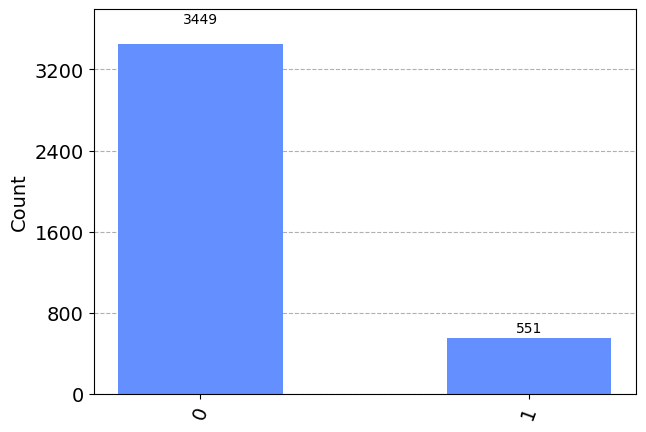

In [40]:
# basics quantum circuits
from qiskit import QuantumCircuit # type: ignore

circuit = QuantumCircuit(1)

circuit.h(0)
circuit.t(0)
circuit.h(0)
circuit.t(0)
circuit.z(0)

ket0 = Statevector([1, 0])
v = ket0.evolve(circuit)
statistics = v.sample_counts(4000)
#v.draw("text")
plot_histogram(statistics)



## Exercises

1. What will be the result of measurement of an invalid state vector? Define an invalid state vector and measure it.